1. import thư viện.

In [33]:
import cv2
import numpy as np
import os
import glob
import math
import matplotlib.pyplot as plt

2. Show ảnh bàn cờ.

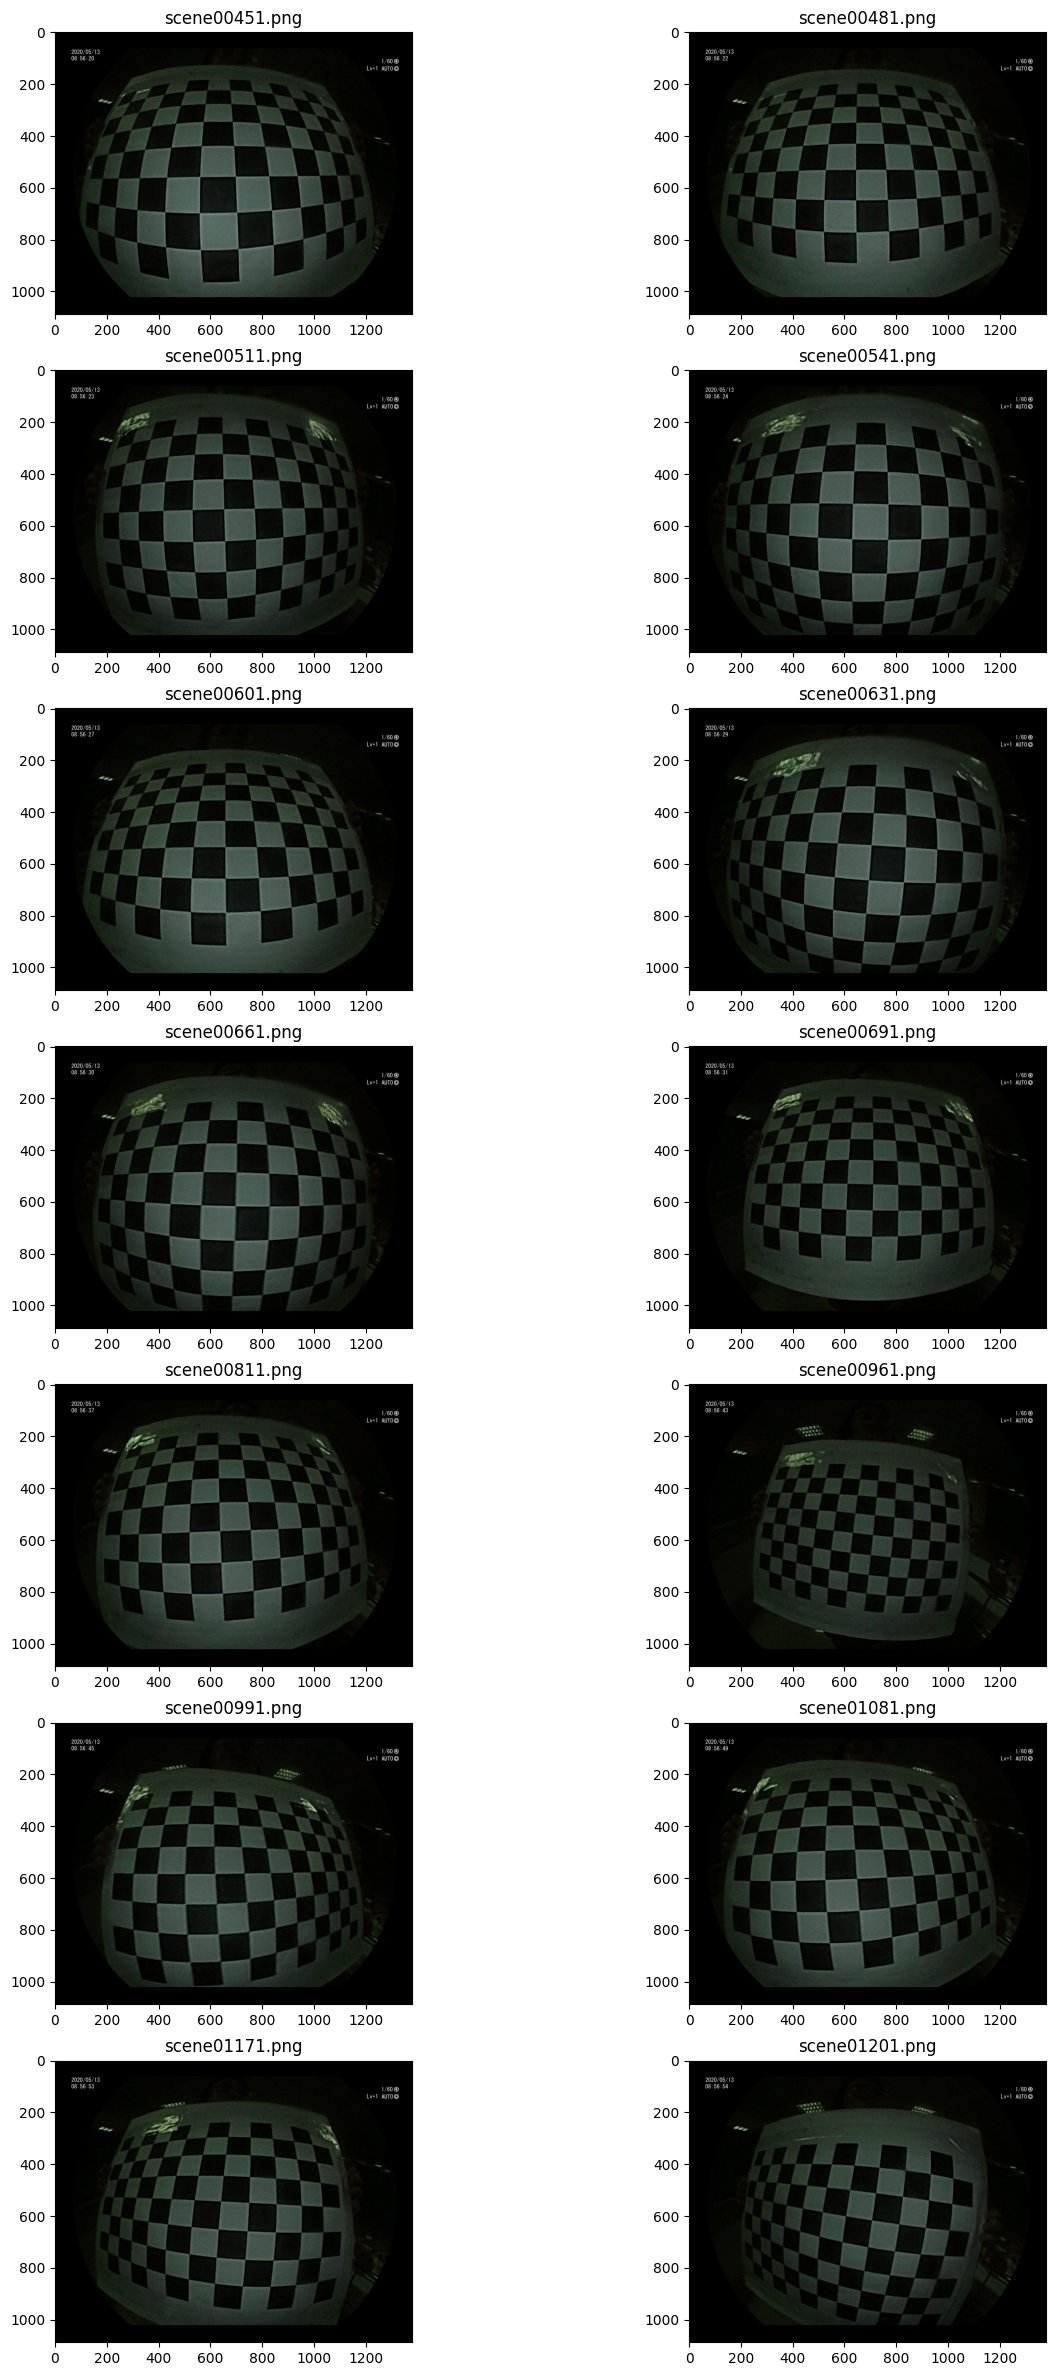

In [34]:
images =  glob.glob("chessboard/*.png")
col = 2
row = int(math.ceil(len(images)/col))

plt.figure(figsize=(15,30))

for i, fname in enumerate(images):
    img = cv2.imread(fname)
    plt.subplot(row, col, i+1) #subplot(row, col, local) #row, col la hien thi cac anh nhu ma tran row x col
                            # i+1 la vi tri cua anh trong ma tran do
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(os.path.basename(fname))

3. Chuẩn bị.

3.1/ Giới hạn vòng lặp.

In [35]:
criteria = (cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS, 30, 0.01)
# so vong lap theo rule/ term dua vao max vong lap va epsilon
# lan luot la 30 va 0.01

3.2/ Kích thước bàn cờ.

In [36]:
# dem duoc tu hinh anh ban co
# -1 cac canh cot va dong
cbrow = 11
cbcolumn = 7

3.3/ Tạo tọa độ thực của bàn cờ.

In [37]:
# object point
objp = np.zeros((cbrow*cbcolumn,3),np.float32)
objp[:,:2] = np.mgrid[0:cbrow, 0:cbcolumn].T.reshape(-1,2)
objp.shape

(77, 3)

3.3/ Tìm góc cạnh, tọa độ của bàn cờ

In [38]:
impoints = [] #luu toa do cua anh
objpoints = [] #luu toa do thuc cua anh

In [39]:
imgs = glob.glob("chessboard/*.png")
i = 0
for fname in imgs:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Tim goc (corner) dua tren method co san va dua tren 3 tieu chi
    # check nhanh de kiem tra xem co la ban co
    # duyet theo hinh vuong
    # su dung nguong tuong thich
    ret, corners = cv2.findChessboardCorners(gray, (11,7), None, flags = cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_FILTER_QUADS + cv2.CALIB_CB_ADAPTIVE_THRESH)

    if ret == True: #Neu tim duoc goc trong hinh
        corners2 = cv2.cornerSubPix(gray, corners, (11,11), (1,1), criteria)
        impoints.append(corners2)
        objpoints.append(objp)
    else:
        os.remove(fname)
cv2.destroyAllWindows

<function destroyAllWindows>

3.4/ Hiệu chỉnh cabliration.

In [40]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, impoints, gray.shape[::-1], None, None, flags=cv2.CALIB_RATIONAL_MODEL)
dist = np.array(dist)

4. Áp thông số vào bàn cờ

In [41]:
current_directory = os.getcwd()
current_directory

'd:\\SpaceToWork\\CVA\\Unit3_Camera_Cabliration'

In [42]:
img1 = cv2.imread(glob.glob("chessboard/*.png")[0])
h, w = img1.shape[:2]

newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

resultImage = glob.glob("chessboard/*.png")
for rimg in resultImage:
    img = cv2.imread(rimg)
    
    # khu meo anh (undistort)
    mapx, mapy = cv2.initUndistortRectifyMap(mtx, dist, None, newcameramtx, (w,h), 5)
    dst = cv2.remap(img, mapx, mapy, cv2.INTER_LINEAR)
    
    # luu ket qua anh
    path = os.path.join(current_directory, 'result_chessboard\\Calibration_') + os.path.basename(rimg)
    if not os.path.exists(path):
        cv2.imwrite(path, dst) #luu anh tai vi tri duong dan path


mean_error = 0
for i in range(len(objpoints)):
    impoints2, _ =  cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(impoints[i], impoints2, cv2.NORM_L2)/len(impoints2)
    mean_error = mean_error + error
print("Total error: ", mean_error/len(objpoints))
cv2.waitKey(0)
cv2.destroyAllWindows()

Total error:  0.21176663165345144


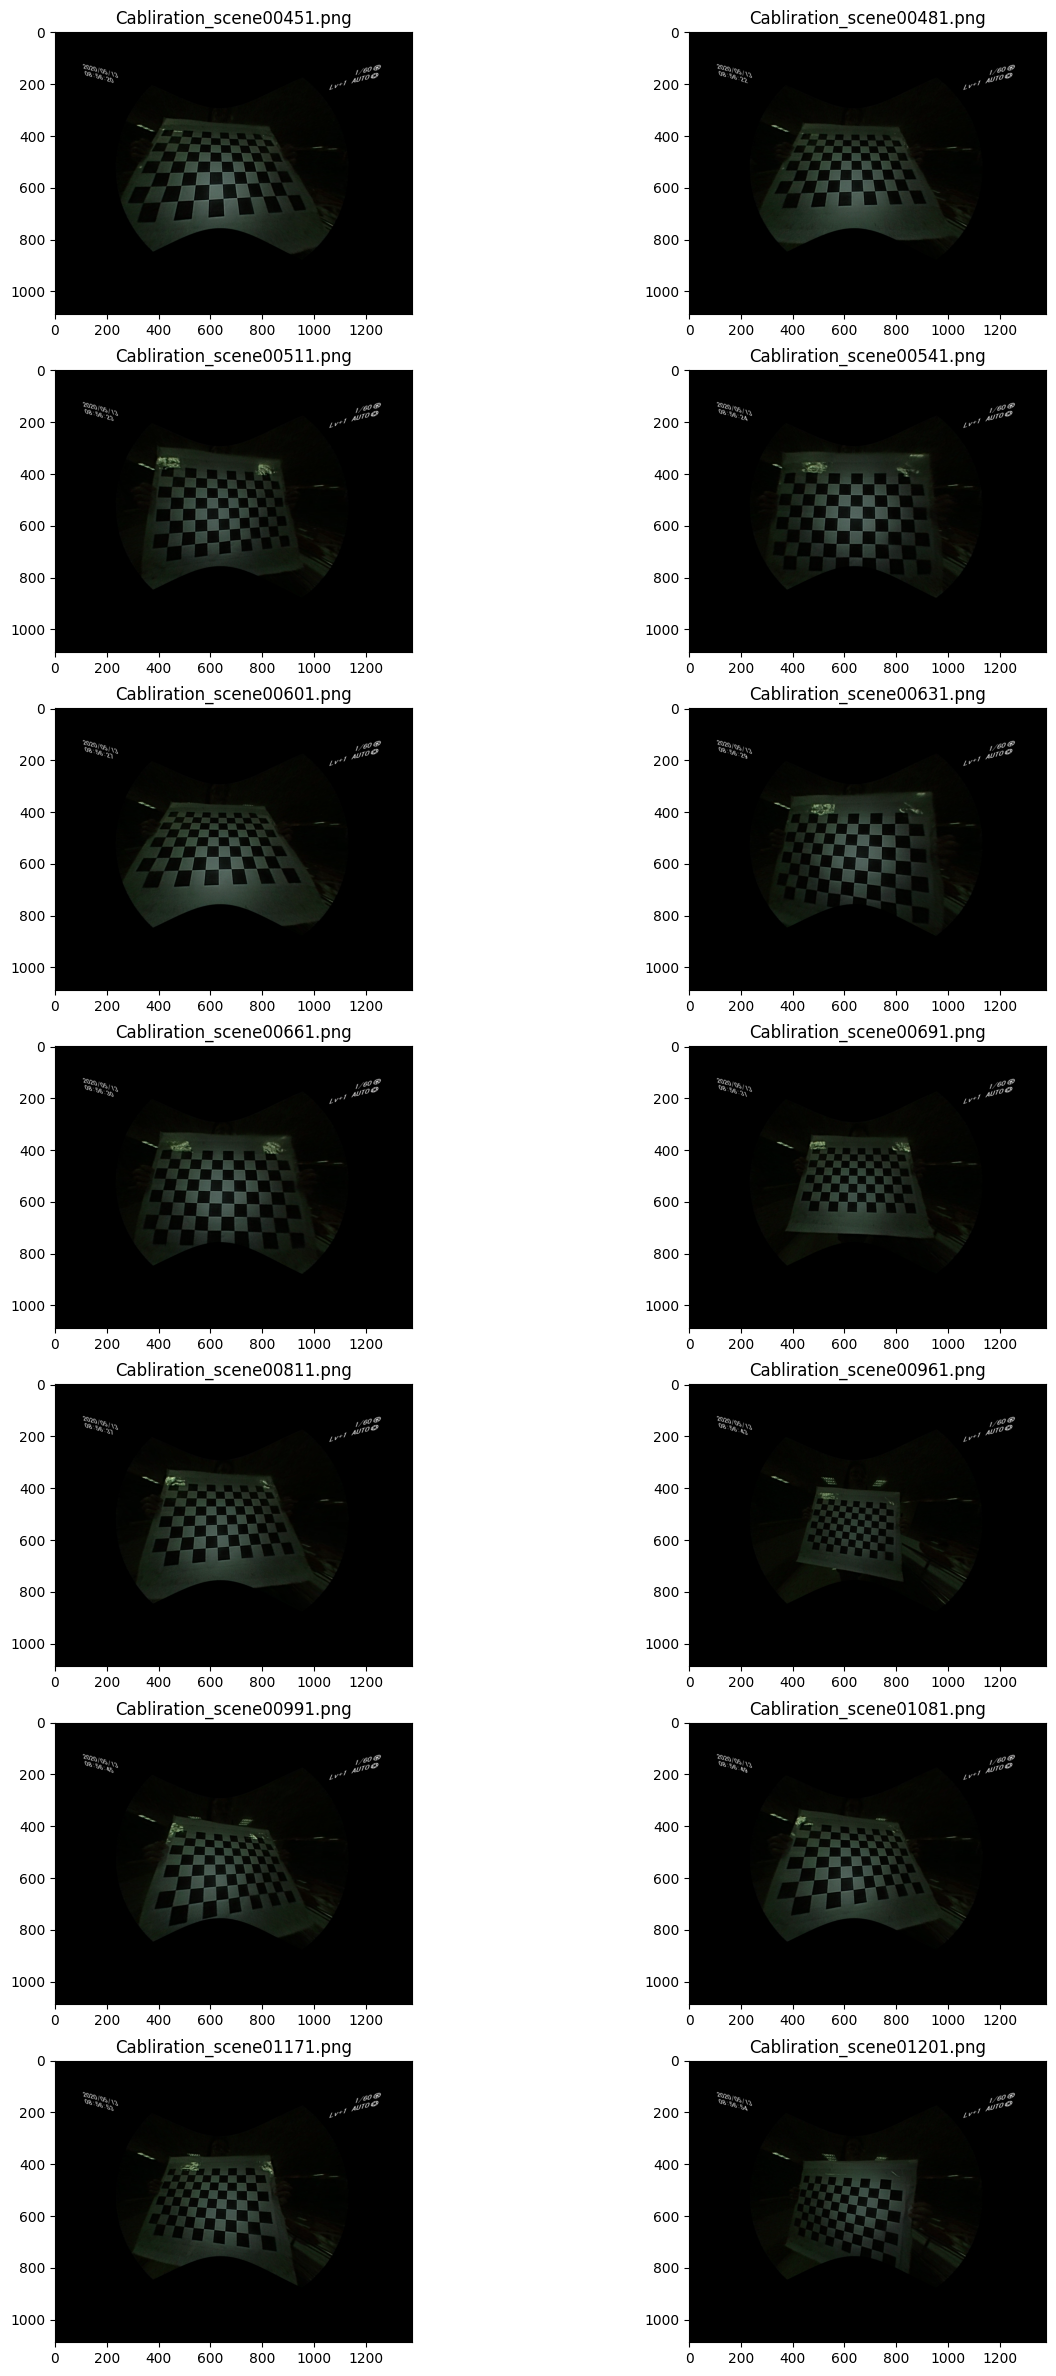

In [43]:
images =  glob.glob("result_chessboard/*.png")
col = 2
row = int(math.ceil(len(images)/col))

plt.figure(figsize=(15,30))

for i, fname in enumerate(images):
    img = cv2.imread(fname)
    plt.subplot(row, col, i+1) #subplot(row, col, local) #row, col la hien thi cac anh nhu ma tran row x col
                            # i+1 la vi tri cua anh trong ma tran do
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(os.path.basename(fname))

5. Áp thông số vào ảnh.

In [44]:
img1 = cv2.imread(glob.glob("Scenes/*.png")[0])
h, w = img1.shape[:2]

newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

resultImage = glob.glob("Scenes/*.png")
for rimg in resultImage:
    img = cv2.imread(rimg)
    
    # khu meo anh (undistort)
    mapx, mapy = cv2.initUndistortRectifyMap(mtx, dist, None, newcameramtx, (w,h), 5)
    dst = cv2.remap(img, mapx, mapy, cv2.INTER_LINEAR)
    
    # luu ket qua anh
    path = os.path.join(current_directory, 'result_scenes\\Calibration_') + os.path.basename(rimg)
    if not os.path.exists(path):
        cv2.imwrite(path, dst) #luu anh tai vi tri duong dan path


mean_error = 0
for i in range(len(objpoints)):
    impoints2, _ =  cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(impoints[i], impoints2, cv2.NORM_L2)/len(impoints2)
    mean_error = mean_error + error
print("Total error: ", mean_error/len(objpoints))
cv2.waitKey(0)
cv2.destroyAllWindows()

Total error:  0.21176663165345144


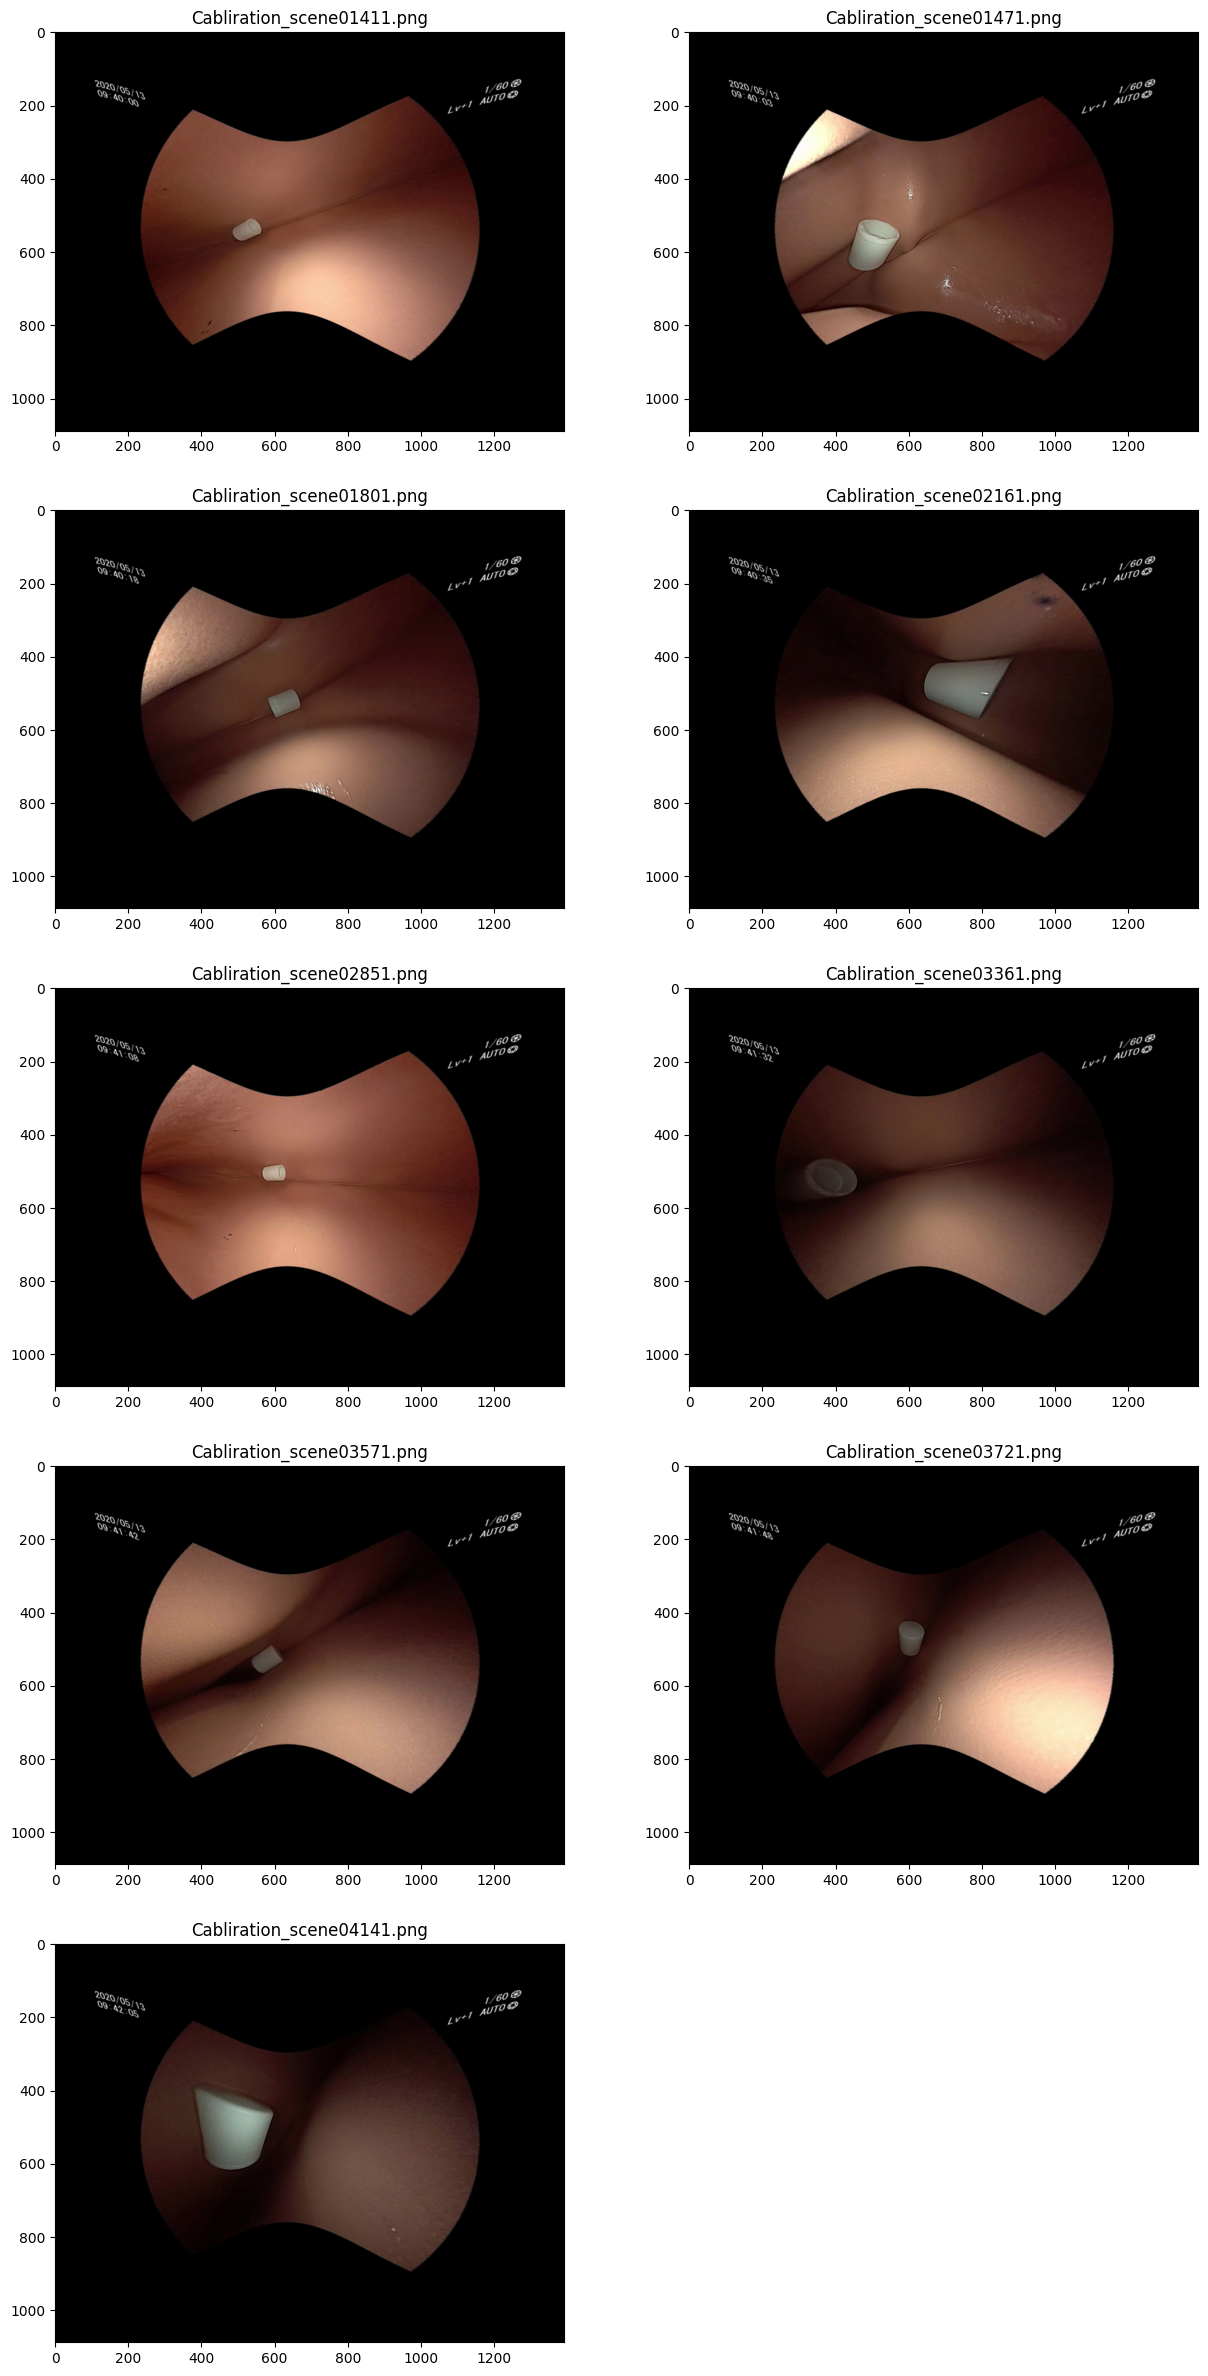

In [45]:
images =  glob.glob("result_scenes/*.png")
col = 2
row = int(math.ceil(len(images)/col))

plt.figure(figsize=(15,30))

for i, fname in enumerate(images):
    img = cv2.imread(fname)
    plt.subplot(row, col, i+1) #subplot(row, col, local) #row, col la hien thi cac anh nhu ma tran row x col
                            # i+1 la vi tri cua anh trong ma tran do
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(os.path.basename(fname))

## Tóm lại: ta có ảnh bàn cờ, ta sẽ trích các tọa độ thực và tọa độ trên ảnh thông qua các bước chuẩn bị. Rồi đưa các cặp tọa độ vào hàm để tìm ra các hệ số trong và ngoài (thông số camera, vector tịnh tiến, vector xoay). Dựa vào hình bàn cờ mà ta đã có được thông số đầy đủ, ta áp vào ảnh thực tế. Mỗi vòng lặp tính khoảng cách L2 của 2 tọa độ ảnh hàm tìm được so với tọa độ ảnh từ thông số camera và tọa độ thực tương ứng chuyển thành. 